In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [ ]:
import os
os.getcwd() 

In [ ]:
os.listdir()

In [ ]:
#call_data = pd.read_csv('2016 and 2017 911 calls.csv')

#call_data

In [2]:
call_data_2016 = pd.read_csv('2016 data.csv')

call_data_2016

,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Date,Time,Longitude,Latitude
0,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,1/1/16 0:00,1/1/16,0:00,-122.358650,47.626724
1,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,1/1/16 0:02,1/1/16,0:02,-122.334206,47.576653
2,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,0:02,-122.332880,47.601300
3,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,0:02,-122.357800,47.521950
4,BLOCKING VEHICLE,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:05,1/1/16,0:05,-122.284100,47.556450
5,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:08,1/1/16,0:08,-122.386765,47.569736
6,"HARASSMENT, THREATS","THREATS, HARASSMENT","THREATS, HARASSMENT",1/1/16 0:09,1/1/16,0:09,-122.303310,47.605120
7,"ANIMALS - INJURED, DEAD, DANGEROUS",ANIMAL COMPLAINTS,ANIMAL COMPLAINTS,1/1/16 0:09,1/1/16,0:09,-122.273390,47.551907
8,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:11,1/1/16,0:11,-122.258200,47.514280
9,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:13,1/1/16,0:13,-122.333170,47.614820


In [3]:
weather_data = pd.read_csv('weather data.csv')

weather_data

,STATION,STATION_NAME,DATE,DATE.1,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110611,6/11/11,0.00,0.0,0.0,-9999,66,52
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110612,6/12/11,0.01,0.0,0.0,-9999,70,48
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110613,6/13/11,0.11,0.0,0.0,-9999,68,52
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110614,6/14/11,0.00,0.0,0.0,-9999,63,51
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110615,6/15/11,0.06,0.0,0.0,-9999,65,48
5,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110616,6/16/11,0.00,0.0,0.0,-9999,70,46
6,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110617,6/17/11,0.00,0.0,0.0,-9999,71,46
7,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110618,6/18/11,0.41,0.0,0.0,-9999,58,53
8,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110619,6/19/11,0.03,0.0,0.0,-9999,63,51
9,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20110620,6/20/11,0.00,0.0,0.0,-9999,70,54


### weather_condition

In [4]:
### weather conditions (2016 only!!!)

precip = np.array(weather_data.ix[1665:2048, 4])
temp_max = np.array(weather_data.ix[1665:2048, 8])
temp_min = np.array(weather_data.ix[1665:2048, 9])

In [5]:
## how to make an average_temp weather condition, where each item in the array is column 8 and 9 averaged together

average_temp = np.zeros(len(weather_data.ix[1665:2048, 8]))

for day in range(len(weather_data.ix[1665:2048, 8])): 
    avg = (weather_data.ix[1665+day, 8] + weather_data.ix[1665+day, 9])/2
    average_temp[day] = avg

#average_temp

### crime_condition

In [8]:
## for 2016 strictly

event_clearance_groups = call_data_2016.ix[:,2].unique()
event_clearance_groups

array(['TRAFFIC RELATED CALLS', 'SUSPICIOUS CIRCUMSTANCES', 'DISTURBANCES',
       'THREATS, HARASSMENT', 'ANIMAL COMPLAINTS', 'NUISANCE, MISCHIEF',
       'FALSE ALACAD', 'NARCOTICS COMPLAINTS', 'BURGLARY', 'FRAUD CALLS',
       'ASSAULTS', 'MOTOR VEHICLE COLLISION INVESTIGATION',
       'LIQUOR VIOLATIONS', 'ARREST', 'BEHAVIORAL HEALTH', 'HAZARDS',
       'OTHER PROPERTY', 'TRESPASS', 'WEAPONS CALLS',
       'PROPERTY - MISSING, FOUND', 'ROBBERY', 'PERSON DOWN/INJURY',
       'PROPERTY DAMAGE', 'PUBLIC GATHERINGS', 'CAR PROWL', 'SHOPLIFTING',
       'AUTO THEFTS', 'BIKE', 'PERSONS - LOST, FOUND, MISSING',
       'MISCELLANEOUS MISDEMEANORS', 'LEWD CONDUCT', 'PROWLER',
       'HARBOR CALLS', 'OTHER VICE', 'PROSTITUTION',
       'DRIVE BY (NO INJURY)', 'HOMICIDE',
       'FAILURE TO REGISTER (SEX OFFENDER)', 'RECKLESS BURNING',
       'VICE CALLS'], dtype=object)

In [ ]:
### doesn't work? we should fix this somehow


call_dates = np.array(call_data_2016.ix[:, 4].unique())

precip_data = [] 

for i in range(len(call_dates_2016)):

    if weather_data.ix[i, 3] == call_dates[i]:
        precip_data.append(weather_data.ix[i, 4])
    else:
        
print(precip_data)

# Code to create an array of counts for *all* calls

In [10]:
## For 2016

starting_date = '1/1/16' 
all_calls = [] 
counter = 0

for i in range(len(call_data_2016.index)):    
    if call_data_2016.ix[i, 4] == starting_date:         
        counter += 1
    else:     
        all_calls.append(counter)     
        starting_date = call_data_2016.ix[i, 4]
        counter = 0
    
#print(all_calls)

### Narcotics Test Run

In [12]:
# For 2016

date = '1/1/16' 
day_data = [] 
narc = 0

for i in range(len(call_data_2016.index)):    
    if call_data_2016.ix[i, 4] == date:         
        # print('found date')        
        if call_data_2016.ix[i, 2] == 'NARCOTICS COMPLAINTS':             
            narc = narc + 1            
            # print('narcotics event')   
    else:     
        #print(date) 
        #print(narc)
        day_data.append(narc)     
        date = call_data_2016.ix[i, 4]
        narc = 0
        
        # print(narc)
    
#print(day_data)

In [13]:
len(day_data)

364

In [14]:
#weather_data.ix[1665:2075, :]

In [ ]:
#fig = plt.figure(figsize = (12,4))

#plt.plot(precip, 'blue', label='Precipitation')
#plt.plot(day_data, 'green', label='Narcotics Complaints')
#plt.legend()
#plt.xlim(0, 365)
#plt.ylim(0, 35)
#plt.xlabel('Day of the Year')
#plt.ylabel('Number of Narcotics Calls')
#plt.ylabel

fig2, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(precip, 'b')
ax1.set_xlabel('Day of the Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Precipitation', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(day_data, 'g')
ax2.set_ylabel('Number of Narcotics Calls', color='g')
ax2.tick_params('y', colors='g')

plt.xlim(0, len(day_data))
plt.title('Precipitation vs. Number of Narcotics 911 Calls in 2016')
plt.show()
fig2.savefig('precipitation_narcotics_title.png')

In [ ]:
plt.hist(day_data, bins=10, color='orange')
plt.xlabel('Number of Narcotics Complaints Made')
plt.ylabel('Frequency')
plt.title('Frequency of Narcotics Calls Per Day in 2016')

plt.show()
#plt.savefig('freq_narcotics___.png')

## Defining functions for graphing and call type arrays

In [15]:
def call_type_freq(start_date, event_clearance_group):

    daylist = [] 
    count = 0

    for i in range(len(call_data_2016.index)):
        if call_data_2016.ix[i, 4] == start_date:                
            if call_data_2016.ix[i, 2] == event_clearance_group:             
                count = count + 1            
        else:
            daylist.append(count)
            start_date = call_data_2016.ix[i, 4]
            count = 0
    return daylist


In [ ]:
burglary = call_type_freq('1/1/16', 'BURGLARY')

In [ ]:
burglary

In [16]:
def plot_two_sided(weather_condition, weather_label, crime_condition, crime_label, title):

    fig, ax1 = plt.subplots(figsize=(12,4))
    ax1.plot(weather_condition, 'RoyalBlue', alpha=0.8)
    ax1.set_xlabel('Day of the Year')
    ax1.set_ylabel(weather_label, color='RoyalBlue')
    ax1.tick_params('y', colors='RoyalBlue')

    ax2 = ax1.twinx()
    ax2.plot(crime_condition, 'Maroon', alpha=0.8)
    ax2.set_ylabel(crime_label, color='Maroon')
    ax2.tick_params('y', colors='Maroon')
    
    plt.xlim(0, len(crime_condition))
    plt.title(title)
    plt.show()

#plot_two_sided(precip, 'Precipitation', burglary, 'Burglaries', 'Burglaries vs. Precipitation, 2016')

## Testing Different Call Types and Weather Patterns

In [ ]:
#public_gatherings = call_type_freq('1/1/16','PUBLIC GATHERINGS')

#plot_two_sided(precip, 'Precipitation', public_gatherings, 'Public Gatherings', 
#               'Public Gatherings vs. Precipitation, 2016')

In [ ]:
#plot_two_sided(temp_max, 'Maximum Temperature', public_gatherings, 'Public Gatherings', 
#               'Number of Public Gatherings and Maximum Temperature, 2016')

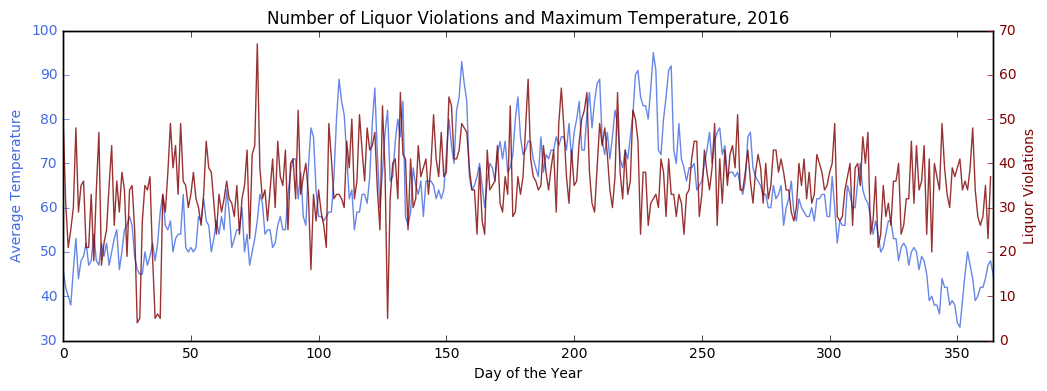

In [17]:
liquor_violations = call_type_freq('1/1/16','LIQUOR VIOLATIONS')

plot_two_sided(temp_max, 'Average Temperature', liquor_violations, 'Liquor Violations', 
               'Number of Liquor Violations and Maximum Temperature, 2016')

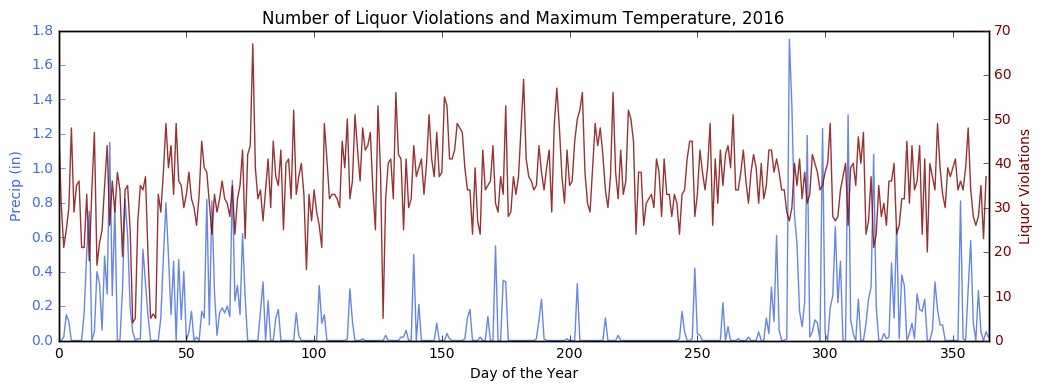

In [18]:
plot_two_sided(precip, 'Precip (in)', liquor_violations, 'Liquor Violations', 
               'Number of Liquor Violations and Maximum Temperature, 2016')

# All types of calls versus temperature and precipitation

In [ ]:
plot_two_sided(average_temp, 'Average Temperature', all_calls, '911 Calls', 
               'Number of 911 Calls and Average Temperature, 2016')

# Statistics

What do we want to do about the statistics issue? How do we compare two plotted lines to see how significant these results are? Have to figure out if this is important or just some coincidence

# Working on sorting by time

In [19]:
def call_time_freq(start_date):
    
    hourlist = np.zeros(24)  
    count = 0
    time = '0:00'

    for i in range(len(call_data_2016.index)):
        
        import time
        time = time.strptime(call_data_2016.ix[i, 5], '%H:%M').tm_hour
        current = hourlist[time]
        hourlist[time] = current + 1
        
    return hourlist

In [ ]:
print(call_data_2016.ix[1, 5])

import time

time = time.strptime(call_data_2016.ix[1, 5], '%H:%M')
time.tm_hour

In [ ]:
import time 

time.strptime(call_data_2016.ix[1, 5], '%H:%M').tm_hour

In [20]:
call_time = call_time_freq('1/1/16')

In [ ]:
call_time

In [ ]:
ind = np.arange(24)

plt.bar(ind, call_time, color = 'Salmon')

plt.ylabel('Number of 911 calls')
plt.xlabel('Hour of the day in 24 hour format')
plt.title('2016 911 calls throughout day')
plt.xlim(0, 24)

plt.savefig('2016 911 calls.jpg')

In [21]:
def call_time_freq_defined(start_date, refine):

    hourlist = np.zeros(24)  
    count = 0
    time = '0:00'

    for i in range(len(call_data_2016.index)):
        
        if call_data_2016.ix[i, 2] == refine:         
        
            import time
            time = time.strptime(call_data_2016.ix[i, 5], '%H:%M').tm_hour
            current = hourlist[time]
            hourlist[time] = current + 1
        
    return hourlist 

In [22]:
traffic_calls = call_time_freq_defined('1/1/16', 'TRAFFIC RELATED CALLS')

In [ ]:
traffic_calls

In [23]:
liquor_calls = call_time_freq_defined('1/1/16', 'LIQUOR VIOLATIONS')

In [ ]:
liquor_calls

In [ ]:
ind = np.arange(24)

width = 0.35 

a = plt.bar(ind, traffic_calls, width, color = 'Red', alpha=0.6, label = 'Traffic calls')
b = plt.bar(ind + width, liquor_calls, width, color = 'Blue', alpha=0.6, label = 'Liquor calls')
plt.ylabel('Number of 911 calls')
plt.xlabel('Hour of the day in 24 hour format')
plt.title('2016 Traffic related calls throughout day')
plt.xlim(0, 24)

plt.legend((a[0], b[0]), ('Traffic calls', 'Liquor calls'))

plt.savefig('2016 Traffic and alcohol related 911 calls.jpg')

plt.show()



In [28]:
print(event_clearance_groups)

['TRAFFIC RELATED CALLS' 'SUSPICIOUS CIRCUMSTANCES' 'DISTURBANCES'
 'THREATS, HARASSMENT' 'ANIMAL COMPLAINTS' 'NUISANCE, MISCHIEF'
 'FALSE ALACAD' 'NARCOTICS COMPLAINTS' 'BURGLARY' 'FRAUD CALLS' 'ASSAULTS'
 'MOTOR VEHICLE COLLISION INVESTIGATION' 'LIQUOR VIOLATIONS' 'ARREST'
 'BEHAVIORAL HEALTH' 'HAZARDS' 'OTHER PROPERTY' 'TRESPASS' 'WEAPONS CALLS'
 'PROPERTY - MISSING, FOUND' 'ROBBERY' 'PERSON DOWN/INJURY'
 'PROPERTY DAMAGE' 'PUBLIC GATHERINGS' 'CAR PROWL' 'SHOPLIFTING'
 'AUTO THEFTS' 'BIKE' 'PERSONS - LOST, FOUND, MISSING'
 'MISCELLANEOUS MISDEMEANORS' 'LEWD CONDUCT' 'PROWLER' 'HARBOR CALLS'
 'OTHER VICE' 'PROSTITUTION' 'DRIVE BY (NO INJURY)' 'HOMICIDE'
 'FAILURE TO REGISTER (SEX OFFENDER)' 'RECKLESS BURNING' 'VICE CALLS']


# Heat Mapping

In [33]:
import seaborn as sns
sns.set()

In [42]:
heatdata = []
for i in range(40):
    heatdata.append(call_time_freq_defined('1/1/16', event_clearance_groups[i]))
print(heatdata)

[array([ 1418.,  1198.,  1046.,   864.,   844.,   773.,   884.,  1780.,
        2470.,  2466.,  2372.,  2413.,  2446.,  2502.,  2300.,  2277.,
        2290.,  2166.,  1943.,  2010.,  2116.,  2158.,  2115.,  1724.]), array([ 1817.,  1727.,  1399.,  1486.,  1322.,   899.,   672.,   747.,
         893.,   932.,   894.,  1123.,  1680.,  1692.,  1501.,  1498.,
        1598.,  1561.,  1408.,  1995.,  2254.,  2036.,  2090.,  1985.]), array([ 2524.,  2375.,  2040.,  1903.,  1470.,   796.,   641.,   696.,
         708.,   723.,   693.,  1072.,  1333.,  1235.,  1299.,  1354.,
        1417.,  1450.,  1282.,  1979.,  2109.,  1998.,  2165.,  2470.]), array([ 110.,  102.,   77.,  101.,   48.,   31.,   21.,   29.,   27.,
         54.,   64.,  135.,   99.,  129.,  135.,  147.,  166.,  140.,
        154.,  279.,  132.,  129.,  128.,  121.]), array([ 35.,  25.,  21.,  19.,  20.,  16.,   7.,   9.,  19.,  26.,  12.,
        15.,  22.,  19.,  19.,  28.,  34.,  20.,  16.,  44.,  66.,  60.,
        51.,  43.

In [121]:
## can we set up a pandas dataframe that has each hour, and then a count for each type of call? 

heat_df = pd.DataFrame(heatdata).T
heat_df.columns = event_clearance_groups
heat_df

,TRAFFIC RELATED CALLS,SUSPICIOUS CIRCUMSTANCES,DISTURBANCES,"THREATS, HARASSMENT",ANIMAL COMPLAINTS,"NUISANCE, MISCHIEF",FALSE ALACAD,NARCOTICS COMPLAINTS,BURGLARY,FRAUD CALLS,...,LEWD CONDUCT,PROWLER,HARBOR CALLS,OTHER VICE,PROSTITUTION,DRIVE BY (NO INJURY),HOMICIDE,FAILURE TO REGISTER (SEX OFFENDER),RECKLESS BURNING,VICE CALLS
0,1418.0,1817.0,2524.0,110.0,35.0,271.0,496.0,90.0,282.0,53.0,...,29.0,28.0,7.0,4.0,12.0,8.0,0.0,0.0,3.0,0.0
1,1198.0,1727.0,2375.0,102.0,25.0,235.0,471.0,130.0,248.0,31.0,...,30.0,34.0,4.0,2.0,5.0,7.0,0.0,0.0,1.0,0.0
2,1046.0,1399.0,2040.0,77.0,21.0,187.0,367.0,68.0,190.0,30.0,...,20.0,18.0,4.0,3.0,3.0,7.0,0.0,0.0,0.0,0.0
3,864.0,1486.0,1903.0,101.0,19.0,153.0,373.0,142.0,266.0,28.0,...,27.0,25.0,1.0,0.0,7.0,15.0,3.0,0.0,1.0,0.0
4,844.0,1322.0,1470.0,48.0,20.0,189.0,606.0,82.0,127.0,7.0,...,10.0,20.0,0.0,2.0,3.0,7.0,3.0,0.0,0.0,0.0
5,773.0,899.0,796.0,31.0,16.0,143.0,475.0,44.0,101.0,9.0,...,8.0,22.0,0.0,0.0,1.0,5.0,1.0,0.0,1.0,0.0
6,884.0,672.0,641.0,21.0,7.0,157.0,453.0,39.0,98.0,4.0,...,10.0,13.0,2.0,0.0,3.0,3.0,1.0,2.0,3.0,0.0
7,1780.0,747.0,696.0,29.0,9.0,332.0,519.0,60.0,109.0,22.0,...,9.0,7.0,3.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0
8,2470.0,893.0,708.0,27.0,19.0,346.0,506.0,63.0,163.0,52.0,...,19.0,9.0,3.0,0.0,2.0,1.0,0.0,7.0,0.0,0.0
9,2466.0,932.0,723.0,54.0,26.0,325.0,505.0,88.0,239.0,79.0,...,17.0,5.0,4.0,2.0,2.0,1.0,0.0,6.0,1.0,0.0


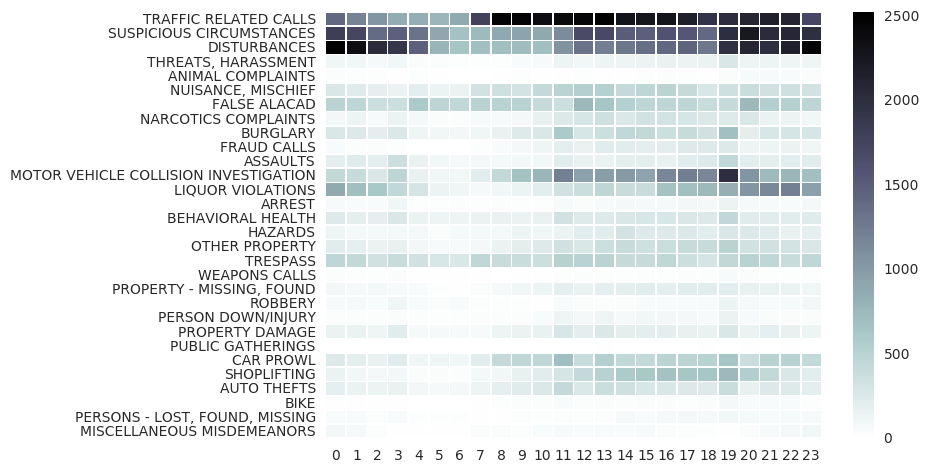

In [136]:
ax = sns.heatmap(heat_df.ix[:, :30].T, linewidths=0.5, cmap='bone_r')


# Mapping
city of seattle, divided by census tracts if possible? 